In [17]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.animation import ArtistAnimation, FFMpegWriter

path_bousinessq = "../data/boussinesq.nc"
path_2dcylinder = "../data/cylinder2d.nc"

In [18]:
def loadDataset(path):
    return Dataset(path)

In [19]:
cylinder2D = loadDataset(path_2dcylinder)
boussinesq = loadDataset(path_bousinessq)
print(cylinder2D)
print(boussinesq)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    creation_date: 12-Apr-2019 21:00:57
    grid: regular
    dimensions(sizes): xdim(640), ydim(80), tdim(1501), const(1)
    variables(dimensions): float32 u(tdim,ydim,xdim), float32 v(tdim,ydim,xdim), float32 xdim(xdim), float32 ydim(ydim), float32 tdim(tdim), float32 nu(const), float32 radius(const), float32 Re(const)
    groups: 
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    creation_date: 15-Apr-2019 13:19:03
    grid: regular
    dimensions(sizes): xdim(150), ydim(450), tdim(2001), const(1)
    variables(dimensions): float32 u(tdim,ydim,xdim), float32 v(tdim,ydim,xdim), float32 xdim(xdim), float32 ydim(ydim), float32 tdim(tdim), float32 radius(const), float32 obstacle_pos_x(const), float32 obstacle_pos_y(const)
    groups: 


## Info about the datasets

### Cylinder 2D

    dimensions(sizes): xdim(640), ydim(80), tdim(1501), const(1)

    variables(dimensions): float32 u(tdim,ydim,xdim), float32 v(tdim,ydim,xdim), float32 xdim(xdim), float32 ydim(ydim), float32 tdim(tdim), float32 nu(const),                             float32 radius(const), float32 Re(const)

### Bousinessq


    dimensions(sizes): xdim(150), ydim(450), tdim(2001), const(1)

    variables(dimensions): float32 u(tdim,ydim,xdim), float32 v(tdim,ydim,xdim), float32 xdim(xdim), float32 ydim(ydim), float32 tdim(tdim),
                           float32 radius(const), float32 obstacle_pos_x(const), float32 obstacle_pos_y(const)

### Accessing variables

    cylinder2D['variable_name']


In [12]:
type(cylinder2D['xdim'])
print(cylinder2D['u'].shape)
print(cylinder2D['tdim'].shape)

NameError: name 'cylinder2D' is not defined

In [ ]:
data = cylinder2D

def velFromUV(data):
    
    u = data['u'][1000,:,:]
    v = data['v'][1000,:,:]

    vel = np.sqrt(u**2 + v**2)

In [ ]:
u = np.array(cylinder2D['u'])

fig, ax = plt.subplots()
ims = [[ax.imshow(u[i], animated=True)] for i in range(1, len(u))]

ani = ArtistAnimation(fig, ims, interval=1000 , blit=True, repeat_delay=1000)

# plt.show()

# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

In [ ]:
plt.matshow(data['v'][1000,:,:])
plt.axis('off')
plt.show()

```
% Create snapshot matrix
Nt = length(S(1,1,:));
S = reshape(permute(S, [3 2 1]), Nt, [ ]); % Reshape data into a matrix S with Nt rows
U = S - repmat(mean(S,1), Nt, 1); % Subtract the temporal mean from each row

% Create correlation matrix
C_s = (U*U')/(Nt-1);

% Solve eigenvalue problem
[A_s LAM_s] = eig(C_s,'vector');

% Sort eigenvalues and eigenvectors
[lambda_s,ilam_s] = sort(LAM_s,'descend');
A_s = A_s(:, ilam_s);

% These are the temporal modes
% Calculate spatial coefficients
PHI_s = U'*A_s;

% Reconstruction on mode k
k = 1; % for example
Utilde_k_s = A_s(:,k)*PHI_s(:,k)';

% Normalization to match direct and snapshot modes (optional)
PHI = normc(PHI_s);

% Spatial modes
A = U*PHI;

% Time coefficients
Utilde_k = A(:,k)*PHI(:,k)';
% Reconstruction on mode k
```

In [ ]:
S = np.transpose(u, (1,2,0))
print(S.shape)
Nt = u.shape[0]
print(Nt)
U = 

In [ ]:
from zipfile import ZipFile

url = "https://cgl.ethz.ch/Downloads/Data/ScientificData/cylinder2d_nc.zip"
file_name = "../data2/" + url.split('/')[-1]
with ZipFile(file_name, 'r') as zipObj:
   zipObj.extractall('temp')

# Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Input=np.load('../data/cylinder_u.npy')
Input=np.load('../data/boussinesq_u.npy')

In [3]:
Output=np.load('../output/120.npy')
ip=np.load('../input/120.npy')

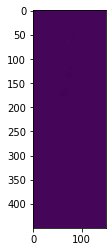

In [8]:
plt.imshow(Output[0])

[[ 0.00027406  0.00027638  0.00027869 ... -0.00027034 -0.00026437
  -0.0002584 ]
 [ 0.00029166  0.00029472  0.00029778 ... -0.00028884 -0.00028242
  -0.000276  ]
 [ 0.00030926  0.00031307  0.00031687 ... -0.00030734 -0.00030046
  -0.00029359]
 ...
 [-0.0003764  -0.00037724 -0.00037809 ... -0.00046752 -0.00046791
  -0.0004683 ]
 [-0.00037536 -0.00037614 -0.00037693 ... -0.0004723  -0.00047283
  -0.00047336]
 [-0.00037432 -0.00037505 -0.00037577 ... -0.00047707 -0.00047774
  -0.00047842]]


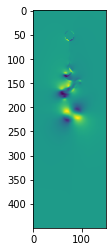

In [5]:
plt.imshow(ip[500])
print(ip[500])
# plt.imshow(ip[510])

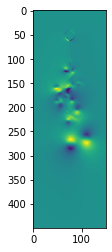

In [6]:
plt.imshow(Input[700])
# plt.imshow(Input[145])

In [ ]:
fig=plt.figure(1)
plt.subplot(2, 1, 1)
plt.imshow(Output[1000])
plt.subplot(2,1,2)
plt.imshow(Input[1000])
plt.savefig('compf_10')

In [ ]:
plt.imshow(Output[800]-ip[800])
plt.colorbar(orientation='horizontal')

In [ ]:
np.max(Output[200][:,100]-Input[200][:,100])

In [ ]:
print(np.min(Input[800]))
print(np.min(Output[800]))
print(np.max(Input[800]))
print(np.max(Output[800]))

In [ ]:
print(np.min(ip[800]))
print(np.max(ip[800]))

In [1]:
from model import autoencoder_B, LSTM_B
from utils import load_transfer_learning
final_model= LSTM_B()
pretrained = autoencoder_B()
# PATH = "../weights/1000.pth"
PATH = "../weights/bous_500.pth"
# pdb.set_trace()
model = load_transfer_learning(pretrained, final_model, PATH)

lstm1.weight_ih_l0 True
lstm1.weight_hh_l0 True
lstm1.bias_ih_l0 True
lstm1.bias_hh_l0 True
lstm1.weight_ih_l1 True
lstm1.weight_hh_l1 True
lstm1.bias_ih_l1 True
lstm1.bias_hh_l1 True
lstm1.weight_ih_l2 True
lstm1.weight_hh_l2 True
lstm1.bias_ih_l2 True
lstm1.bias_hh_l2 True
lstm2.weight_ih_l0 True
lstm2.weight_hh_l0 True
lstm2.bias_ih_l0 True
lstm2.bias_hh_l0 True
lstm2.weight_ih_l1 True
lstm2.weight_hh_l1 True
lstm2.bias_ih_l1 True
lstm2.bias_hh_l1 True
lstm2.weight_ih_l2 True
lstm2.weight_hh_l2 True
lstm2.bias_ih_l2 True
lstm2.bias_hh_l2 True
encoder.0.weight False
encoder.0.bias False
encoder.1.weight False
encoder.1.bias False
encoder.3.weight False
encoder.3.bias False
encoder.4.weight False
encoder.4.bias False
encoder.6.weight False
encoder.6.bias False
encoder.7.weight False
encoder.7.bias False
encoder.9.weight False
encoder.9.bias False
encoder.10.weight False
encoder.10.bias False
encoder.12.weight False
encoder.12.bias False
encoder.13.weight False
encoder.13.bias False
en

(1501, 80, 640)
(150, 10, 80, 640)


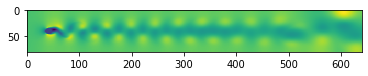

In [23]:
u = np.load('../data/cylinder_u.npy', allow_pickle=True)
print(u.shape)
u_ = np.reshape(u[:1500,...], (-1, 10, u.shape[1], u.shape[2]))
print(u_.shape)
plt.imshow(u_[100][0])


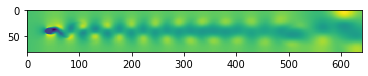

In [17]:
plt.imshow(u_[100][1])

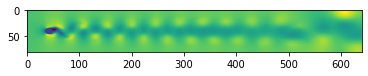

In [18]:
plt.imshow(u_[100][2])

In [36]:
def insert_time_channel(data, channels):
    data_new = np.reshape(data[:(int(1501/channels)*channels),...],
        (-1, channels, u.shape[1], u.shape[2]))
    return data_new

In [37]:
print(insert_time_channel(u, 10).shape)

(150, 10, 80, 640)


In [39]:
data = np.load('../data/cylinder_u.npy', allow_pickle=True)
print(data.shape)
data_new = np.array([data[i:i+10] for i in range(u.shape[0]-10)])
print(data_new.shape)

(1501, 80, 640)
(1491, 10, 80, 640)


In [44]:
hm = {i:range(i, i+10) for i in range(data.shape[0]-10)}


In [45]:
print(hm)

nge(649, 659), 650: range(650, 660), 651: range(651, 661), 652: range(652, 662), 653: range(653, 663), 654: range(654, 664), 655: range(655, 665), 656: range(656, 666), 657: range(657, 667), 658: range(658, 668), 659: range(659, 669), 660: range(660, 670), 661: range(661, 671), 662: range(662, 672), 663: range(663, 673), 664: range(664, 674), 665: range(665, 675), 666: range(666, 676), 667: range(667, 677), 668: range(668, 678), 669: range(669, 679), 670: range(670, 680), 671: range(671, 681), 672: range(672, 682), 673: range(673, 683), 674: range(674, 684), 675: range(675, 685), 676: range(676, 686), 677: range(677, 687), 678: range(678, 688), 679: range(679, 689), 680: range(680, 690), 681: range(681, 691), 682: range(682, 692), 683: range(683, 693), 684: range(684, 694), 685: range(685, 695), 686: range(686, 696), 687: range(687, 697), 688: range(688, 698), 689: range(689, 699), 690: range(690, 700), 691: range(691, 701), 692: range(692, 702), 693: range(693, 703), 694: range(694, 7